# オブジェクト指向

## オブジェクトの属性とメソッド

複素数は，real, imag というデータ属性をもっていました。このように，各オブジェクトは、その属するクラス（型と同義でした）ごとに決まったデータ属性(attribute)を持っています。データ属性は，オブジェクト指向的なプログラムの場合には，インスタンス変数ともいいます。今まで，リストなどのオブジェクトに対してメソッド呼び出しを行ってきました。リストは，その内容をデータ属性として持っています。プログラムでは，もっと複雑な，構造を持ったデータを扱います。例えば，学生のデータは，名前，所属，学年，学籍番号などのデータを持つでしょう。これらのものを，学生オブジェクトがインスタンス変数として持つように，学生クラスを定義するのが自然でしょう。また，オブジェクトには，メソッド呼び出しができましたが，そのオブジェクトに対して呼び出せるメソッドも，オブジェクトが持つ属性です。このように，属性には，データ属性（インスタンス変数）とメソッドがあります。データ属性が python での名称ですが，ここでは，オブジェクト指向で一般に使われているインスタンス変数という呼び方で説明しましょう。

通常の変数や関数は，main モジュールの名前空間に登録された値でした。同様に，
それぞれのオブジェクトは名前空間を持っており，属性は，その名前空間に登録された値です。そして，属性の中で，関数がメソッド，関数以外のものがインスタンス変数です。インスタンス変数は，変更可能(mutable)な場合と，そうでない場合があります。変更可能な場合は，代入によって値を変えたり，del 関数で削除したりできます。

インスタンス変数には，
```
オブジェクト.変数名
```
という形でアクセスしました。また，メソッド呼び出しは，
```
オブジェクト.メソッド名()
```
という形でアクセスしました。これらは，モジュールに属する変数や関数のアクセスと同じ形をしています。
このように，. は，オブジェクトやモジュールの名前空間から，その名前のものをとってくるという演算です。
そして，それが関数の時には，"(引数の列)" を後ろにつけると，その関数の呼び出しになります。ただし，メソッド，すなわち，オブジェクトの名前空間に属する関数の呼び出しは，通常の関数の呼び出しと大きな違いがあります。通常の関数の定義と呼び出しは，次のようになされました。


In [22]:
def sum(x):
    r = 0;
    for a in x:
        r += a;
    return r
print(sum)
print(sum([1,2,3]))

<function sum at 0x7f9c156d5ca0>
6


それに対して，メソッド呼び出しの時には，そのメソッドが定義されているオブジェクトが，関数に第一引数として与えられます。つまり，
```
オブジェクト.メソッド名(引数１, ..., 引数n)
```
という呼び出しがなされると，メソッド名の関数に対して，
```
メソッド名(オブジェクト，引数１, ..., 引数n)
```
という関数呼び出しがなされます。
実際，append は，リストと要素をもらって，そのリストにその要素を付け加える２引数の関数として定義されています。そして，その第１引数には，メソッドを送られたリストオブジェクトが渡されます。

In [12]:
a= [1,2,3,4];
a.append(5)
print(a)

[1, 2, 3, 4, 5]


## オブジェクト指向の考え方

少し複雑ですが，オブジェクトの属性となっている関数の呼び出し方をこのように定義しているのは，オブジェクトに，それを処理する手続きも持たせることが，複雑な処理をきれいなプログラムに書くために役に立つからです。

例えば，append という名前は，リストに要素を追加する時には自然ですが，一般的な名前なので，自分でプログラムしている時に，使ってしまうことがありそうです。そのような名前の衝突を避けるには，list_append といった長い名前をそれぞれにつけえていくことが考えられますが，これではプログラムが煩雑になります。もちろん，append の定義を書き換えて，いろんな型の引数に適用できるようにすることもできるでしょうが，それでは，append がどんどん大きくなっていきますし，新しいデータを考えた時に，それに対する append 処理を append 関数に付け加える必要があります。それでは，あるデータを処理するプログラムがあちこちに分散していくことになり，管理がしきれなくなります。

そこで，データに，そのデータを処理するための方法をもたせることが考えられます。それが，オブジェクト指向という考え方です。このようにすると，その処理を利用する人の呼び出し手続きが楽になります。

例えば，あらゆる電化製品は，ON というボタンを持っています。ON が押された時に行わないといけない処理の詳細は，ディスプレイと電灯では違うと思いますが，ON という名前（から想像される処理）は，ON というボタンを押せばできます。
これは，電化製品が ON という処理を中に持っているからです。
これにより，電化製品をオブジェクト，ボタンをメソッドに見立てると
```
オブジェクト.on()
```
という呼び出しで，そのオブジェクトが内部に持つ ON が呼び出されることになります。普通の関数呼び出しなら，ディスプレイの on なら diaplay_on，Aというパソコンの on なら pc_A_on といった具合に別々の関数を定義して，
```
diaplay_on(オブジェクト)
```
などと書くことになると思いますが，これでは，呼び出し処理が大変です。
それに対して
```
オブジェクト.on()
```
で押せるようにすると，オブジェクトが変数 x に代入されている時，
同じ
```
x.on()
```
で，x がディスプレイの時にはディスプレイの ON が，x がパソコンの時にはパソコンの ON が起動されるということもできます。これは，単に個々の処理の名前を覚えなくてもいいという以上の利点があります。
例えば，いろんな家電製品のリストがあったとして，全て ON するのに，for 文で x という変数に順に代入しながら x.on() を実行していくことができます。これが，もし，x の種類ごとに異なる関数を呼び出さないといけないとすると，大変な場合分けのプログラムになってしまいます。

## クラスの定義方法

Python では，全てのデータはオブジェクトであり，オブジェクトはクラス（=型）に属しているという話をしました。あるオブジェクトが持つメソッドは，そのオブジェクトの属するクラスに定義されています。

自分でクラスを定義する方法を説明しますしょう。

クラスの定義は， 
```
class クラス名:
```
ではじめます。クラス名は，大文字から始めることが推奨されています。この後，インデントを下げてある部分がクラス定義となります。クラスの定義の中には，モジュールのトップレベルに記述する時や，関数定義の時と同じように，プログラムが書けます。しかし，普通は，メソッドの定義（と，後に述べるクラス変数の初期値を与える代入）を書きます。

メソッドは，自分自身を第1引数としてとるような関数定義として書きます。

あるクラスのオブジェクトを新たに作るには，クラス名の関数を呼び出します。これを，コンストラクタといいます。`__init__` という名前の，メソッドが定義されていると，コンストラクタが呼び出されて
オブジェクトが新しく作られた時に最初に呼び出されます。

In [25]:
class Point:
    ''' Point class'''
    def __init__(self):
        print("new point generated.")
    def hello(self):
        print(f"Hello I am {self}")
 
print(Point)

point1 = Point()
point2 = Point()
point3 = Point()
print(type(point1))

point1.hello()
point2.hello()
point3.hello()

<class '__main__.Point'>
new point generated.
new point generated.
new point generated.
<class '__main__.Point'>
Hello I am <__main__.Point object at 0x7f9c156c1940>
Hello I am <__main__.Point object at 0x7f9c156c1160>
Hello I am <__main__.Point object at 0x7f9c156c1250>


ここでは Point クラスのインスタンス（あるクラスのオブジェクトを，そのクラスのインスタンスといます）を３つ作ってそれぞれに hello メソッドを呼び出しています。上の例が示すように，これらのPointオブジェクトの型は，`__main__` モジュール のPointクラスです。

メソッドは，呼び出されると，その呼出されたオブジェクトを第１引数として呼び出されます。第１引数は，通常，self という名前で定義します。

オブジェクトは，インスタンス変数を持てるのでした。Point クラスに x というインスタンス変数を与えましょう。インスタンス変数は，オブジェクトの名前空間に登録されている名前でした。すなわち，self にそのオブジェクトが代入されているときには，self.x でアクセスできます。そして，他の変数と同様に，その変数に最初に代入が行われた時にインスタンス変数は作られます。

今度は，`__init__` が２つ引数をとるようにしています。そして，Point(a) という形のコンストラクタ呼び出しでオブジェクトを生成したときに，x というインスタンス変数へ a が代入されることにより，変数が作られることにします。

In [32]:
class Point:
    ''' Point class'''
    def __init__(self, xx):
        self.x = xx
    def __str__(self):
        return f"Point at {self.x}"
    def move(self,dist):
        self.x = self.x + dist
    def moveshow(self, dist):
        self.move(dist);
        print(self);        

        
point1 = Point(20)
point2 = Point(0)
print(point1)  # (20)
point1.move(30)
print(point1)  # (50) 
point1.moveshow(30)    # (80)
print(point2)  # (0)
print(point1.x)


Point at 20
Point at 50
Point at 80
Point at 0
80


通常は，このように，`__init__` の中で初期値を与えるようにインスタンス変数への代入を行ってインスタンス変数を作ります。`__str__` という名前のメソッドを作っておくと，それが，そのオブジェクトを表す文字列を作るのに作られます。print 関数は，引数のオブジェクトに対して `__str__` を呼び出して作られる文字列を表示するように作られているので，print 関数による表示の仕方を設定できます。

rightshow メソッドでは，自分自身に対して，right メソッドを呼び出し，それから，自分自身をprint しています。

インスタンス変数は，オブジェクトの名前空間に登録されているデータ属性なので，最後の行のように
```
オブジェクト.変数名
```
でどこでもアクセスできます。この値は，そのクラスで定義されたメソッド以外でも変更できますし，普通はしませんが，新たな変数を作ることもできてしまいます。


In [35]:
point1.x = 60
print(point1)
point1.new1 = 30
print(point1.new1)

Point at 60
30


このように，python は，言語としてできることと，通常やっていいことが異なります。言語の仕組みを理解することと，通常の書き方と，２つのことを学ぶ必要があります。（それは，自然言語でも同じで，文法的に正しいことと，通常の会話での話し方とは違うでしょう。）

Python は，文法をシンプルで統一的にして言語としてできることを汎用的にして，通常のプログラムの書き方（例えば，このように書いたらオブジェクト指向的にプログラムが書ける）といったことを別に学んで，それに従ってみんながプログラムを書くというスタイルになっています。

point1 の名前空間の状態を確認しておきましょう。`__init__`, `__str__` 以外は，`__` で囲まれた名前は無視してください。


In [36]:
print(dir(point1))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'move', 'moveshow', 'new1', 'x']


オブジェクトは名前空間をもっており，そこにはインスタンス変数とメソッドを持っているのでした。それに加えて，それぞれのクラスも名前空間を持っています。

In [37]:
print(dir(Point))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'move', 'moveshow']


このように，あるクラスで定義されたメソッドは，そのクラスの名前空間にも登録されています。これは，第一引数にオブジェクトを渡して，通常の関数として呼び出すことができます。

In [39]:
Point.move(point1, 50)
print(point1)

Point at 110


In [40]:
a = [1,2,3]
list.append(a,4)
print(a)

[1, 2, 3, 4]


クラスの持つ変数は，クラス変数とよばれ，あるクラスに属するオブジェクトが共有するデータを保持する目的に使われます。クラス変数へのアクセスの形は，
```
クラス名.変数名
```
となります。 クラス定義も普通のプログラムと同じだと話しましたが，クラス定義が実行される時には，
この名前空間でクラス定義の中身が実行されます。よって，そこで"名前空間.変数名" ではなく，変数名だけを用いた変数へ
の代入があると，新しいクラス変数が作られます。

In [50]:
class Point:
    count = 0
    ''' Point class'''
    def __init__(self, xx):
        Point.count += 1
        self.x = xx
    def __str__(self):
        return f"Point at ({self.x})"
    def move(self,dist):
        self.x += dist
    def moveshow(self, dist):
        self.move(dist);
        print(self);        
        
point1 = Point(20)
point2 = Point(0)
print(Point.count)

2


クラス変数は，インスタンスの名前空間からも見ることができます。しかし，それに代入を行うと，インスタンスの名前空間にその変数ができてしまいます。これは，関数定義の中からグローバル変数を使う時と同じです。間違いを防ぐために，クラス変数は，常にクラス名からアクセスするようにすることをおすすめします。

In [51]:
print(dir(point1))
point1.count

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'count', 'move', 'moveshow', 'x']


2

In [52]:
point1.count = 10
print(Point.count, point1.count)

2 10


## 継承

クラスは，すでに存在するクラスを継承して作ることができます。そうすることにより，そこに定義されているインスタンス変数，メソッド定義に，定義を追加（あるいは上書き）する形でクラスを定義することになります。
あるクラスを継承したクラスを定義するには，クラス名の後に継承するクラス名を括弧の中に与えます。

ここでは，(x, y) という2次元の位置をもつである Point2D クラスを作ることにします。

In [54]:
class Point2D(Point):
    ''' Point class'''
    def __init__(self, xx, yy):
        Point.__init__(self,xx)
        self.y = yy
    def move(self,xx):
        self.y += xx
        self.x += xx
    def __str__(self):
        return f"Point at ({self.x}, {self.y})"
        
point1 = Point2D(20,20)
point2 = Point(0)
point1.move(30)
print("Dynamic Dispatch1")
for p in [point1, point2]:
    p.move(30)
    print(p)
print("Dynamic Dispatch2")
for p in [point1, point2]:
    p.moveshow(100)


Dynamic Dispatch1
Point at (80, 80)
Point at (30)
Dynamic Dispatch2
Point at (180, 180)
Point at (130)


In [6]:
print(dir(point1))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'location', 'name', 'right', 'rightshow', 'up', 'x', 'y']


継承したクラスでは，元のクラスで定義されたメソッドも使えますし (moeshow) 書き換えたものも使えます(move)。また，`__init__` で行っているように上書きして定義しながらも，クラス名.メソッド名で，self も与える関数の呼び出しの形で，上書きされた元のメソッドも呼び出すことができます。

Dynamic Dispatch1 の所で，point1, point2 はそれぞれ Point2D, Point であることに注意してください。
両方とも move, moveshow を持っている (move は別のメソッドだが)ので，このようなプログラムが書けます。同じ move メソッドの呼び出しで，point1 と point2 の時で別のメソッドが呼び出されていることに注意して下さい。このように，メソッド名とその意味するオブジェクトとの対応関係が，実行時に決まることど，動的結合(dynamic dispatch) と言ったりします。


最後の，Dynamic Dispatch2 の所では，point1, point2 に Point で定義された moveshow を適用しています。moveshow は move と print を呼び出していますが，ここでも，point2 に対する moveshow の呼び出しでは，Point2D の move が呼び出されていることに注意して下さい。これも，self をもとに，self の名前空間に登録された move が呼び出されているからです。

# Matplotlib のオブジェクトを意識した使い方

https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

これまでは，Matplotlib を，非常に簡易な方法で使ってきました。
Matplotlib で描かれるグラフは，様々な構成要素があり，それは，オブジェクト指向的に構成されています。
Matplotlib の使い方として，それを意識した書き方があり，その方が細かい図の設定などが可能になります。

まず，Matplotlib には，全体図に相当する Figure オブジェクトがあり，plt の figure メソッドを呼び出すことにより作られます。また，座標軸を備えた一つづつのグラフは，Axes とよばれます。Axes は，Figure に add_subplot メソッドを呼び出すことにより作られます。引数は，1つしかグラフがない時には，1,1,1 を与えます。

Axes に plot を呼び出すことにより，そのグラフにplot が行われます。
そして，最後に fig の値を表示しようとすると，画面に図が表示されます。

Figure(432x288)


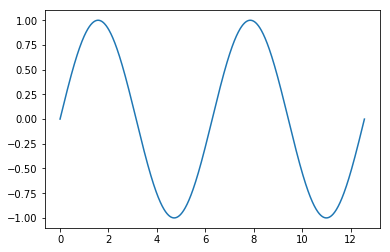

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi*4, 1000)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)


Axes に描画されているものは，lines というインスタンス変数にリストとして格納されています。
最後に fig の値を表示しようとすると，画面に図が表示されます。


1
Line2D(_line0)
2


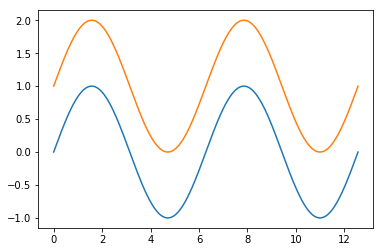

In [2]:
print(ax.lines)
print(len(ax.lines))# 1つの Line2D オブジェクトがあり
print(ax.lines[0])
ax.plot(x, y+1)
print(len(ax.lines))  # 2つの Line2D オブジェクトがあり
fig

Jupyter lab ではなく，Jupyter Notebook を使えば，次のようにして，animation を作成し，表示することができます。ここで，plotは，そこで描画された Line のリストを返します。

<IPython.core.display.Javascript object>


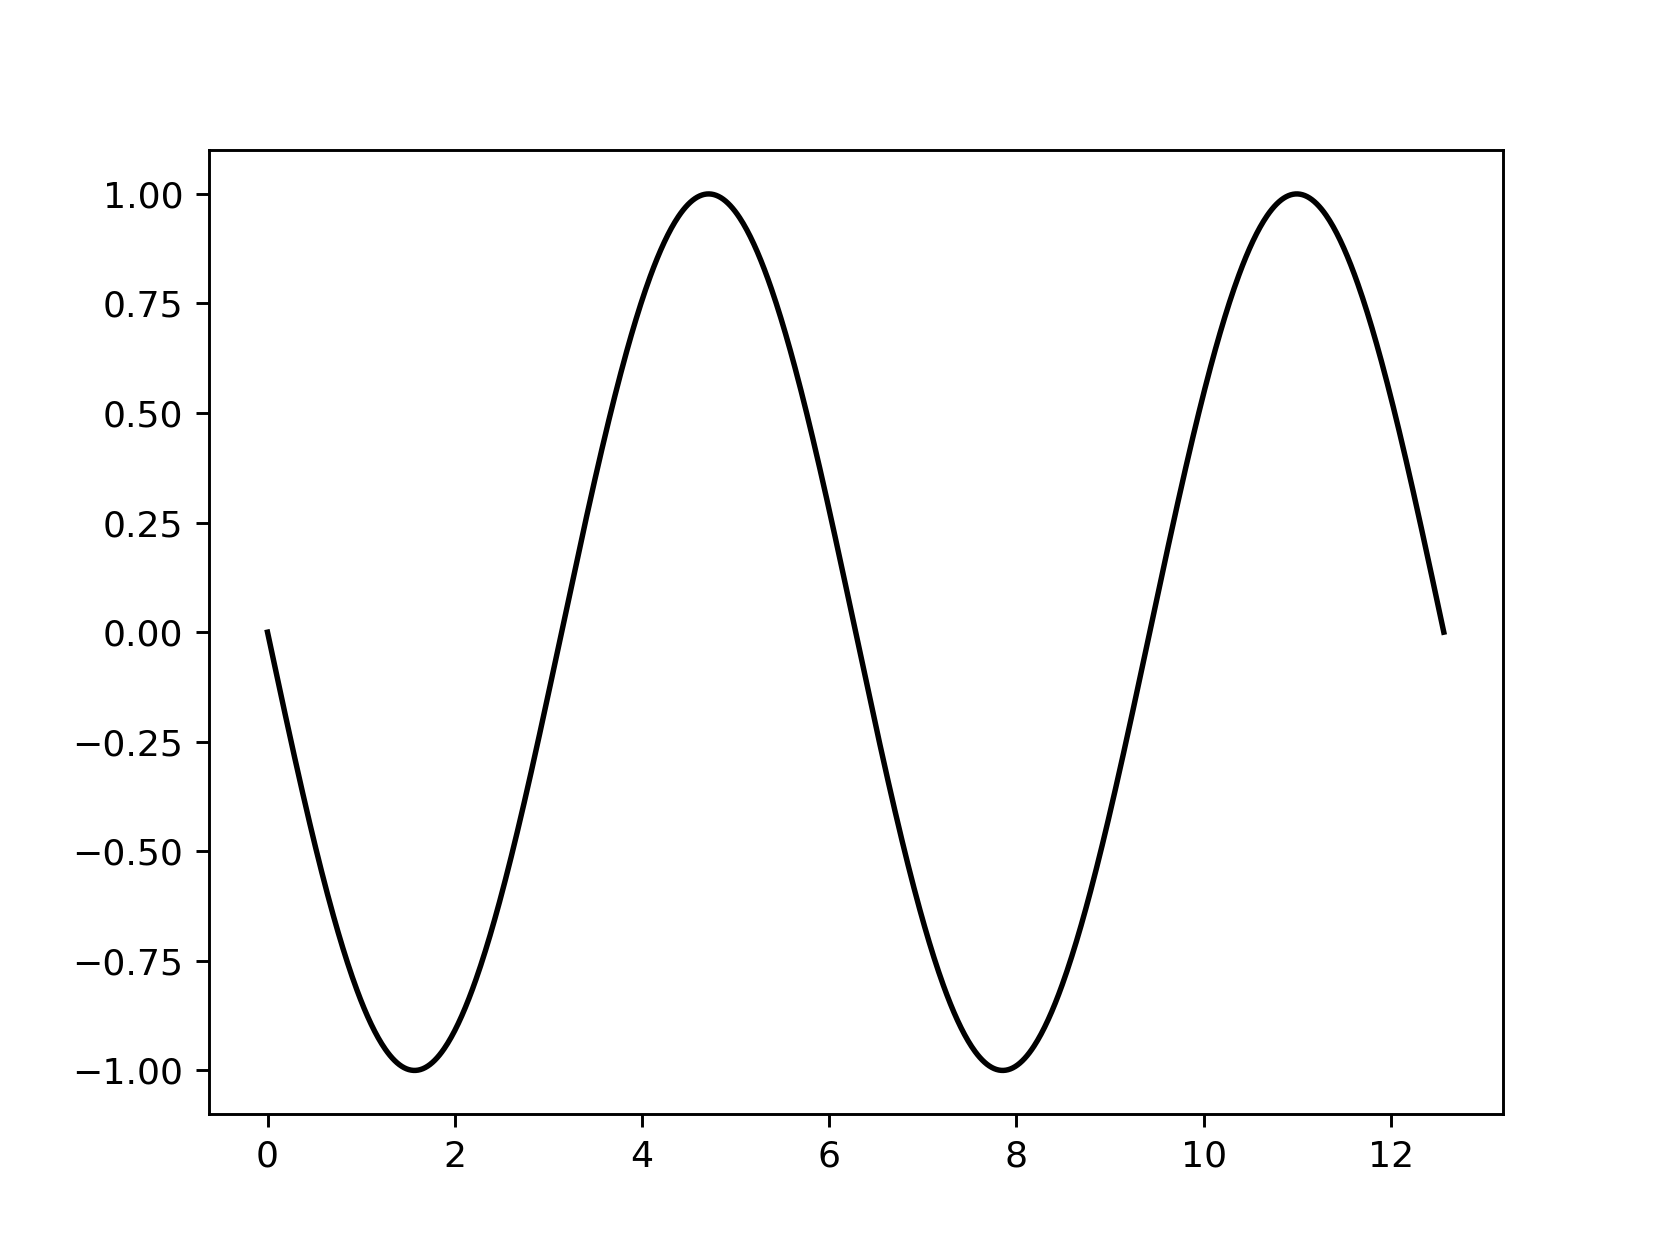

In [1]:

%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 画像を格納するリスト
ims = []

x = np.linspace(0, np.pi*4, 1000)
for i in range(20):    
    y = np.sin(x + 2*np.pi*i/20)
    im = ax.plot(x, y, c="black")
    ims.append(im)

#100 ms ごとに画像を表示
    ani = animation.ArtistAnimation(fig, ims, interval=100)

**練習問題1** 先週の 練習問題 20 を，$a\sin(x-b)$ という関数に対してグラフを書けるように，クラスを用いて書き直してみよう。TaylorSin というクラスを作り，

そこには，a, b をインスタンス変数とし，
sin 関数を  fun という名前で，sin 関数の 0 における i 回目の微分係数を返す関数を d0(i) という名前で定義し，グラフ描画の範囲 ``[-10, 10, -2*self.a, 2*self.a]`` を area というインスタンス変数名で与え，それを用いて n 番目の関数を返す taylor(n, x)，および，n 番目までのグラフを描画するメソッド graph(n) を定義しよう。a, b の値は，コンストラクタの引数で与えることにしよう。

TaylorSin オブジェクトを作成し，それに，taylorgraph(10)を呼び出そう。

**練習問題2** TaylorSin を Taylor クラスと，そのサブクラス Sin に分けよう。Taylor クラスには，taylor, graphを置き，Sin には，それ以外を置こう。
同様に，log(x+1), 1/(x+1), e^x に対するクラス，Log, Inv, Exp を定義しよう。


**練習問題** これを用いて，b を動かした時に，Sin のテイラー展開がどう変化していくかを動画として描画してみよう。